统计directory_path根目录下所有jpg格式照片的焦段分布（自动跳过读不出焦距信息的照片）。建议复制一份，以免对原文件做出改动（虽然应该不会）。

In [90]:
from PIL import Image
import exifread
from fractions import Fraction
import os
import matplotlib.pyplot as plt

In [91]:
# 将形如'121/5', '5', '5.0'之类的字符串转为float
def str_to_float(s):
    # 检查字符串是否包含 '/'
    if '/' in s:
        # 如果包含 '/', 使用 Fraction 来处理分数并转换为 float
        return float(Fraction(s))
    else:
        # 否则直接转换为 float
        return float(s)

In [92]:
# 提取一张图片的特定信息
def img_info(image_path):
    # 使用 exifread 读取 EXIF 信息
    with open(image_path, 'rb') as img_file:
        exif_data = exifread.process_file(img_file)

    # # 查看所有可用的 EXIF 标签
    # for tag in exif_data.keys():
    #     print(f"{tag}: {exif_data[tag]}")

    # 提取具体的参数（例如，焦距、快门速度等）
    nfo = '无焦段信息'
    focal_length = str(exif_data.get('EXIF FocalLength', nfo))

    if focal_length == nfo: # 没有这个信息
        return -1
    else:
        return str_to_float(focal_length)

In [93]:
# 遍历directory下（包括所有子目录），返回jpg文件路径列表
def find_jpg_files(directory):
    jpg_files = []
    # 遍历目录及其子目录
    for root, dirs, files in os.walk(directory):
        for file in files:
            # 检查文件扩展名是否为 .jpg 或 .jpeg（忽略大小写）
            if file.lower().endswith(('.jpg', '.jpeg')):
                # 拼接文件的完整路径
                full_path = os.path.join(root, file)
                jpg_files.append(full_path)
    return jpg_files

In [94]:
# 绘制直方图
def plot_focal_length_histogram(focal_lengths):

    plt.hist(focal_lengths, bins=60, edgecolor='black', color=(0.8157, 0.9059, 0.9294), alpha=0.7)
    
    plt.title('Focal Length Distribution')
    plt.xlabel('Focal Length(mm)')
    plt.ylabel('Frequency')

    # 保存图像，分辨率设置为600 DPI
    plt.savefig('./Focal Length Distribution', dpi=600)
    
    plt.show()

In [100]:
directory_path = 'D:/XS10'  # 根目录，建议复制一份，以免对原文件做出改动（虽然应该不会）

jpg_files = find_jpg_files(directory_path)
focal_lengths = []
for image_path in jpg_files:
    # print(image_path)
    # print(ImgInfo(image_path))
    focal_length = img_info(image_path)
    if focal_length > 0:
        focal_lengths.append(focal_length)

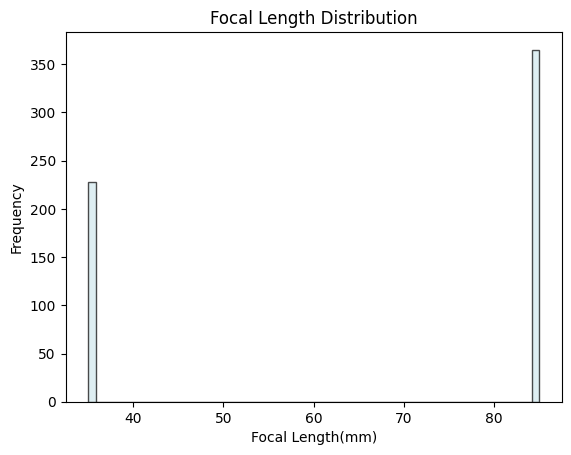

In [101]:
plot_focal_length_histogram(focal_lengths)